# Final Project Data Cleaning 

### 1. Imports

In [2]:
import pandas as pd
import numpy as np 
from typing import List
from typing import Tuple
import seaborn as sns
import matplotlib as plt

### 2. Data Cleaning

In [3]:
df = pd.read_csv("heart.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
def clean_and_encode_data(df: pd.DataFrame,
                        numerical_cols: List[str] = ['Age', 'RestingBP', 'Cholesterol','FastingBS', 'MaxHR', 'Oldpeak' ], 
                          categorical_cols: List[str] = ['Sex', 'RestingECG', 'ExerciseAngina',
                                                          'ST_Slope', 'ChestPainType']) -> pd.DataFrame:
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())
    
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

    df = df.astype(int)
    
    return df
heart_sorted = clean_and_encode_data(df)
heart_sorted.head(10)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,172,0,0,1,1,0,0,0,1,1,0,0
1,49,160,180,0,156,1,1,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,0,1,0,0,1,1,0,0
3,48,138,214,0,108,1,1,0,1,0,1,1,0,0,0,0
4,54,150,195,0,122,0,0,1,1,0,0,0,1,0,1,0
5,39,120,339,0,170,0,0,1,1,0,0,0,1,0,1,0
6,45,130,237,0,170,0,0,0,1,0,0,0,1,1,0,0
7,54,110,208,0,142,0,0,1,1,0,0,0,1,1,0,0
8,37,140,207,0,130,1,1,1,1,0,1,1,0,0,0,0
9,48,120,284,0,120,0,0,0,1,0,0,0,1,1,0,0


<Axes: >

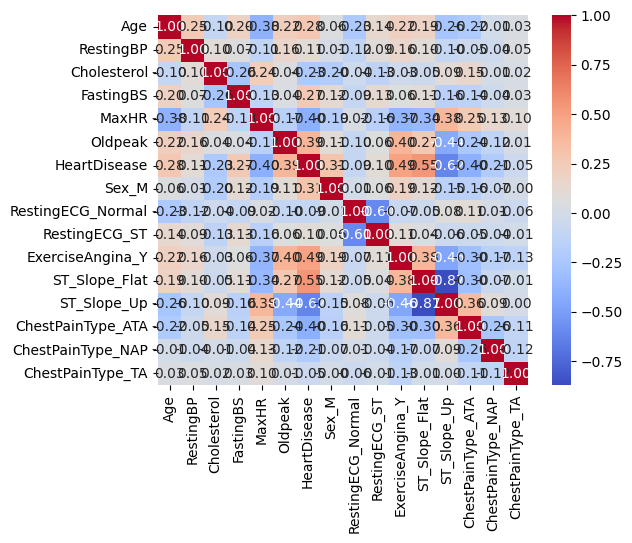

In [5]:
corr = heart_sorted.corr()
#plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)


### 3. Create a New Sorted CSV File

In [6]:
heart_sorted.to_csv("heart_sorted.csv", index= False)

### 4. Check Instance Ratios for Oversampling

In [10]:
heart_positive = ((heart_sorted["HeartDisease"] == 1).sum()).item()
heart_negative = ((heart_sorted["HeartDisease"] == 0).sum()).item()
dataset = [heart_positive, heart_negative]
dfmajor = pd.DataFrame(dataset, index=['Positive', 'Negative'], columns=['Positive vs Negative Instances'])

array([<Axes: ylabel='Positive vs Negative Instances'>], dtype=object)

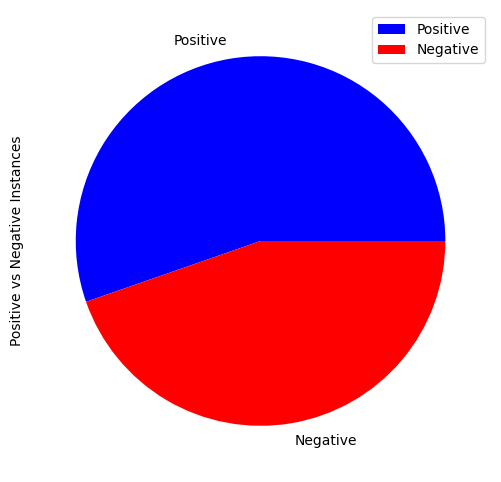

In [11]:
dfmajor.plot(kind='pie', subplots=True, figsize=(8,6), colors = ("blue","red"))